# Title: IP Explorer
<details>
    <summary> <u>Details...</u></summary>
    
**Notebook Version:** 1.0<br>
**Python Version:** Python 3.7 (including Python 3.6 - AzureML)<br>
**Required Packages**: kqlmagic, msticpy, pandas, numpy, matplotlib, networkx, ipywidgets, ipython, scikit_learn, dnspython, ipwhois, folium, holoviews<br>
**Platforms Supported**:
- Azure Notebooks Free Compute
- Azure Notebooks DSVM
- OS Independent

**Data Sources Required**:
- Log Analytics 
    - Heartbeat
    - SecurityAlert
    - SecurityEvent
    - AzureNetworkAnalytics_CL
    
- (Optional)  
    - VirusTotal (with API key)
    - Alienvault OTX (with API key) 
    - IBM Xforce (with API key) 
    - CommonSecurityLog
</details>


Brings together a series of queries and visualizations to help you assess the security state of an IP address. It works with both internal addresses and public addresses. 
<br> For internal addresses it focuses on traffic patterns and behavior of the host using that IP address. For public IPs it lets you perform threat intelligence lookups, passive dns, whois and other checks. 
<br>It also allows you to examine any network traffic between the external IP address and your resources.

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Hunting-Hypothesis" data-toc-modified-id="Hunting-Hypothesis-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Hunting Hypothesis</a></span><ul class="toc-item"><li><span><a href="#IP-Explorer-Mindmap" data-toc-modified-id="IP-Explorer-Mindmap-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>IP Explorer Mindmap</a></span></li></ul></li><li><span><a href="#Notebook-Initialization" data-toc-modified-id="Notebook-Initialization-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Notebook Initialization</a></span><ul class="toc-item"><li><span><a href="#Get-WorkspaceId-and-Authenticate-to-Log-Analytics" data-toc-modified-id="Get-WorkspaceId-and-Authenticate-to-Log-Analytics-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Get WorkspaceId and Authenticate to Log Analytics</a></span></li></ul></li><li><span><a href="#Enter-the-IP-Address-and-query-time-window" data-toc-modified-id="Enter-the-IP-Address-and-query-time-window-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Enter the IP Address and query time window</a></span></li><li><span><a href="#Detemine-IP-Address-Type" data-toc-modified-id="Detemine-IP-Address-Type-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Detemine IP Address Type</a></span></li><li><span><a href="#External-IP" data-toc-modified-id="External-IP-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>External IP</a></span><ul class="toc-item"><li><span><a href="#GeoIP-Lookups-for-External-IP-Addresses" data-toc-modified-id="GeoIP-Lookups-for-External-IP-Addresses-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>GeoIP Lookups for External IP Addresses</a></span></li><li><span><a href="#Whois-Registrars-for-External-IP-Addresses" data-toc-modified-id="Whois-Registrars-for-External-IP-Addresses-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Whois Registrars for External IP Addresses</a></span></li><li><span><a href="#Opensource-and-Azure-Sentinel-ThreatIntel-Lookups" data-toc-modified-id="Opensource-and-Azure-Sentinel-ThreatIntel-Lookups-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Opensource and Azure Sentinel ThreatIntel Lookups</a></span><ul class="toc-item"><li><span><a href="#Configure-your-TI-Provider-settings" data-toc-modified-id="Configure-your-TI-Provider-settings-5.3.1"><span class="toc-item-num">5.3.1&nbsp;&nbsp;</span>Configure your TI Provider settings</a></span></li></ul></li><li><span><a href="#Passive-DNS-lookups-for-External-IP-Addresses" data-toc-modified-id="Passive-DNS-lookups-for-External-IP-Addresses-5.4"><span class="toc-item-num">5.4&nbsp;&nbsp;</span>Passive DNS lookups for External IP Addresses</a></span></li></ul></li><li><span><a href="#Internal-IP-Address" data-toc-modified-id="Internal-IP-Address-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Internal IP Address</a></span><ul class="toc-item"><li><span><a href="#Data-Sources-available-to-query-related-to-IP" data-toc-modified-id="Data-Sources-available-to-query-related-to-IP-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Data Sources available to query related to IP</a></span></li><li><span><a href="#Check-if-IP-is-assigned-to-multiple-hostnames" data-toc-modified-id="Check-if-IP-is-assigned-to-multiple-hostnames-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Check if IP is assigned to multiple hostnames</a></span></li><li><span><a href="#System-Info" data-toc-modified-id="System-Info-6.3"><span class="toc-item-num">6.3&nbsp;&nbsp;</span>System Info</a></span></li><li><span><a href="#ServiceMap---Get-List-of-Services-for-Host" data-toc-modified-id="ServiceMap---Get-List-of-Services-for-Host-6.4"><span class="toc-item-num">6.4&nbsp;&nbsp;</span>ServiceMap - Get List of Services for Host</a></span></li></ul></li><li><span><a href="#Related-Alerts" data-toc-modified-id="Related-Alerts-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Related Alerts</a></span><ul class="toc-item"><li><span><a href="#Visualization---Timeline-of-Related-Alerts" data-toc-modified-id="Visualization---Timeline-of-Related-Alerts-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>Visualization - Timeline of Related Alerts</a></span></li><li><span><a href="#Browse-List-of-Related-Alerts" data-toc-modified-id="Browse-List-of-Related-Alerts-7.2"><span class="toc-item-num">7.2&nbsp;&nbsp;</span>Browse List of Related Alerts</a></span></li></ul></li><li><span><a href="#Related-Hosts" data-toc-modified-id="Related-Hosts-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Related Hosts</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#NOTE---the-following-sections-are-only-relevant-for-Internal-IP-Addresses." data-toc-modified-id="NOTE---the-following-sections-are-only-relevant-for-Internal-IP-Addresses.-8.0.1"><span class="toc-item-num">8.0.1&nbsp;&nbsp;</span><strong>NOTE - the following sections are only relevant for Internal IP Addresses.</strong></a></span></li></ul></li><li><span><a href="#Visualization---Networkx-Graph" data-toc-modified-id="Visualization---Networkx-Graph-8.1"><span class="toc-item-num">8.1&nbsp;&nbsp;</span>Visualization - Networkx Graph</a></span></li></ul></li><li><span><a href="#Related-Accounts" data-toc-modified-id="Related-Accounts-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Related Accounts</a></span><ul class="toc-item"><li><span><a href="#Visualization---Networkx-Graph" data-toc-modified-id="Visualization---Networkx-Graph-9.1"><span class="toc-item-num">9.1&nbsp;&nbsp;</span>Visualization - Networkx Graph</a></span></li></ul></li><li><span><a href="#Logon-Summary-for-Related-Entities" data-toc-modified-id="Logon-Summary-for-Related-Entities-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>Logon Summary for Related Entities</a></span><ul class="toc-item"><li><span><a href="#HeatMap-for-Weekly-failed-logons" data-toc-modified-id="HeatMap-for-Weekly-failed-logons-10.1"><span class="toc-item-num">10.1&nbsp;&nbsp;</span>HeatMap for Weekly failed logons</a></span></li><li><span><a href="#Host-Logons-Timeline" data-toc-modified-id="Host-Logons-Timeline-10.2"><span class="toc-item-num">10.2&nbsp;&nbsp;</span>Host Logons Timeline</a></span></li><li><span><a href="#Failed-Logons-Timeline" data-toc-modified-id="Failed-Logons-Timeline-10.3"><span class="toc-item-num">10.3&nbsp;&nbsp;</span>Failed Logons Timeline</a></span></li></ul></li><li><span><a href="#Network-Connection-Analysis" data-toc-modified-id="Network-Connection-Analysis-11"><span class="toc-item-num">11&nbsp;&nbsp;</span>Network Connection Analysis</a></span><ul class="toc-item"><li><span><a href="#Network-Check-Communications-with-Other-Hosts" data-toc-modified-id="Network-Check-Communications-with-Other-Hosts-11.1"><span class="toc-item-num">11.1&nbsp;&nbsp;</span>Network Check Communications with Other Hosts</a></span></li><li><span><a href="#Query-Flows-by-IP-Address" data-toc-modified-id="Query-Flows-by-IP-Address-11.2"><span class="toc-item-num">11.2&nbsp;&nbsp;</span>Query Flows by IP Address</a></span></li><li><span><a href="#Bulk-whois-lookup" data-toc-modified-id="Bulk-whois-lookup-11.3"><span class="toc-item-num">11.3&nbsp;&nbsp;</span>Bulk whois lookup</a></span></li><li><span><a href="#Choose-ASNs/IPs-to-Check-for-Threat-Intel-Reports" data-toc-modified-id="Choose-ASNs/IPs-to-Check-for-Threat-Intel-Reports-11.4"><span class="toc-item-num">11.4&nbsp;&nbsp;</span>Choose ASNs/IPs to Check for Threat Intel Reports</a></span></li><li><span><a href="#GeoIP-Map-of-External-IPs" data-toc-modified-id="GeoIP-Map-of-External-IPs-11.5"><span class="toc-item-num">11.5&nbsp;&nbsp;</span>GeoIP Map of External IPs</a></span></li><li><span><a href="#Outbound-Data-transfer-Time-Series-Anomalies" data-toc-modified-id="Outbound-Data-transfer-Time-Series-Anomalies-11.6"><span class="toc-item-num">11.6&nbsp;&nbsp;</span>Outbound Data transfer Time Series Anomalies</a></span></li></ul></li><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-12"><span class="toc-item-num">12&nbsp;&nbsp;</span>Conclusion</a></span><ul class="toc-item"><li><span><a href="#List-of-Suspicious-Activities/-Observables/Hunting-bookmarks" data-toc-modified-id="List-of-Suspicious-Activities/-Observables/Hunting-bookmarks-12.1"><span class="toc-item-num">12.1&nbsp;&nbsp;</span>List of Suspicious Activities/ Observables/Hunting bookmarks</a></span></li></ul></li><li><span><a href="#Appendices" data-toc-modified-id="Appendices-13"><span class="toc-item-num">13&nbsp;&nbsp;</span>Appendices</a></span></li><li><span><a href="#Available-DataFrames" data-toc-modified-id="Available-DataFrames-14"><span class="toc-item-num">14&nbsp;&nbsp;</span>Available DataFrames</a></span><ul class="toc-item"><li><span><a href="#Saving-Data-to-Excel" data-toc-modified-id="Saving-Data-to-Excel-14.1"><span class="toc-item-num">14.1&nbsp;&nbsp;</span>Saving Data to Excel</a></span></li></ul></li><li><span><a href="#Configuration" data-toc-modified-id="Configuration-15"><span class="toc-item-num">15&nbsp;&nbsp;</span>Configuration</a></span><ul class="toc-item"><li><span><a href="#msticpyconfig.yaml-configuration-File" data-toc-modified-id="msticpyconfig.yaml-configuration-File-15.1"><span class="toc-item-num">15.1&nbsp;&nbsp;</span><code>msticpyconfig.yaml</code> configuration File</a></span></li></ul></li></ul></div>

<a></a>[Contents](#toc)
## Hunting Hypothesis
Our broad initial hunting hypothesis is that a we have received IP address entity which is suspected to be compromized internal host or external public address to whom internal hosts are communicating in malicious manner, we will need to hunt from a range of different positions to validate or disprove this hypothesis.

Before you start hunting please run the cells in <a>Setup</a> at the bottom of this Notebook.

<a></a>[Contents](#toc)
### IP Explorer Mindmap
Below mindmap diagram shows hunting workflow depending upon the type of IP address provided

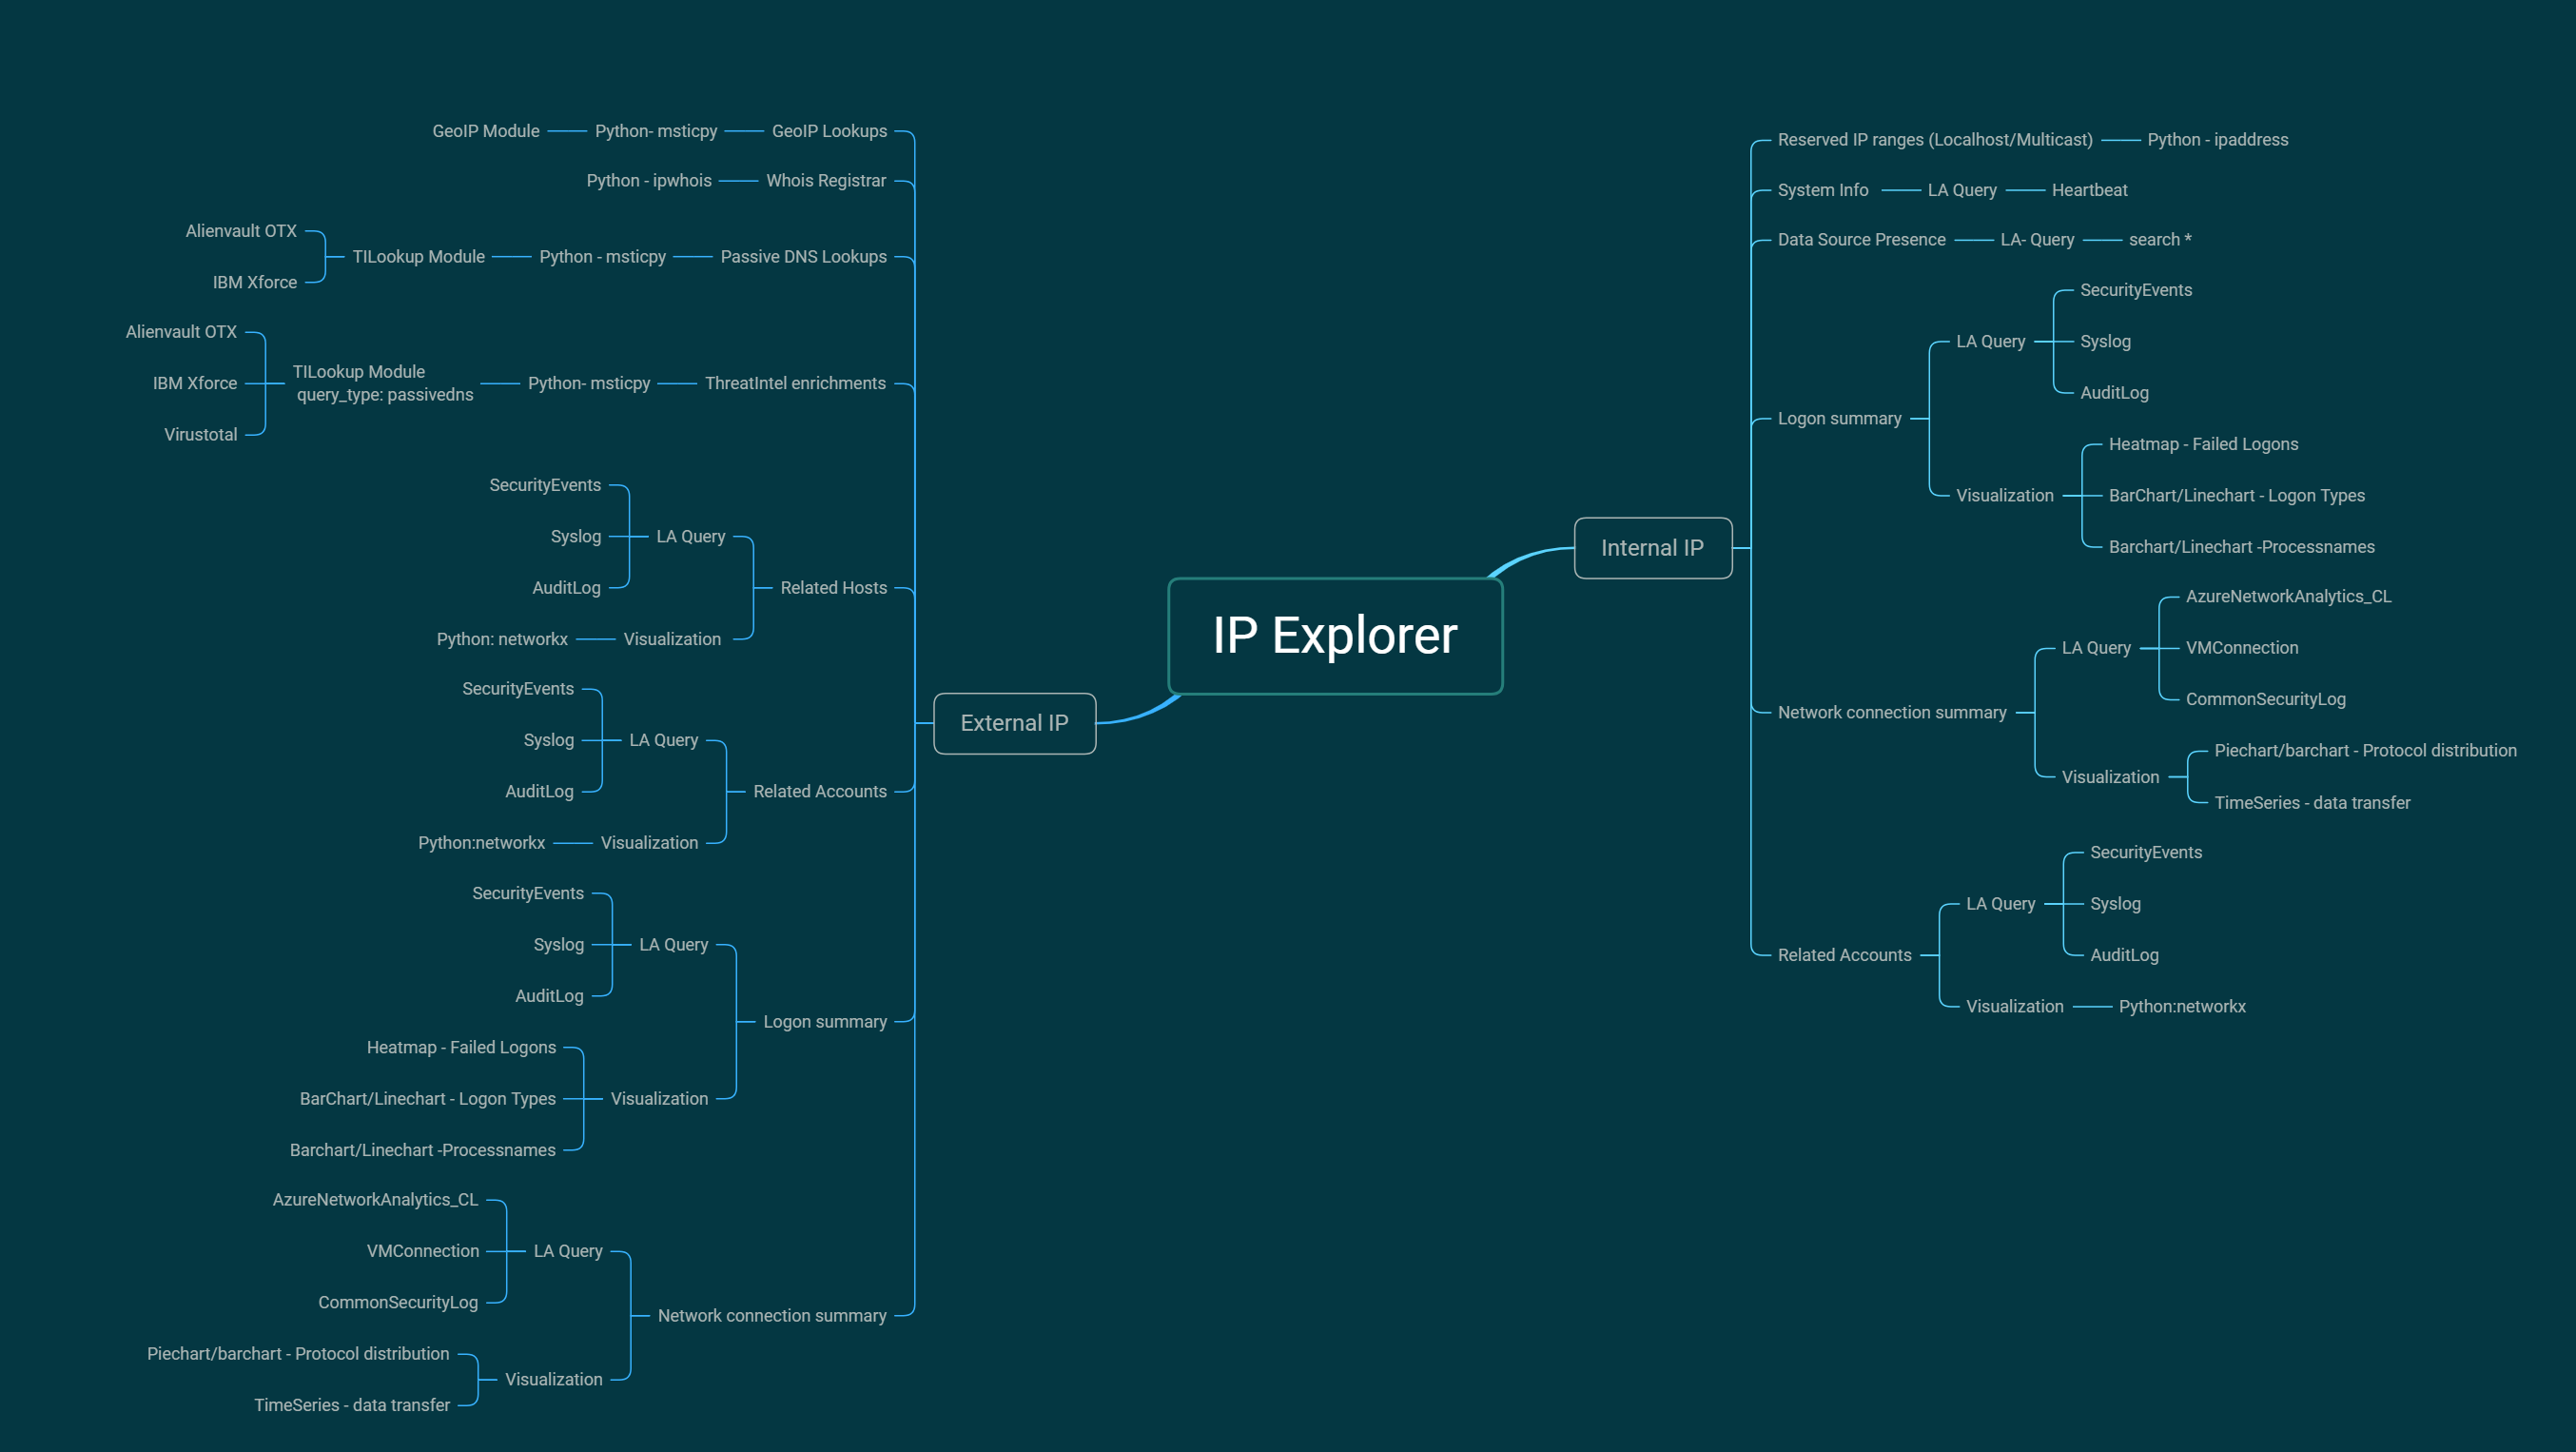

---
### Notebook initialization
The next cell:
- Checks for the correct Python version
- Checks versions and optionally installs required packages
- Imports the required packages into the notebook
- Sets a number of configuration options.

This should complete without errors. If you encounter errors or warnings look at the following two notebooks:
- [TroubleShootingNotebooks](https://github.com/Azure/Azure-Sentinel-Notebooks/blob/master/TroubleShootingNotebooks.ipynb)
- [ConfiguringNotebookEnvironment](https://github.com/Azure/Azure-Sentinel-Notebooks/blob/master/ConfiguringNotebookEnvironment.ipynb)

If you are running in the Azure Sentinel Notebooks environment (Azure Notebooks or Azure ML) you can run live versions of these notebooks:
- [Run TroubleShootingNotebooks](./TroubleShootingNotebooks.ipynb)
- [Run ConfiguringNotebookEnvironment](./ConfiguringNotebookEnvironment.ipynb)

You may also need to do some additional configuration to successfully use functions such as Threat Intelligence service lookup and Geo IP lookup. 
There are more details about this in the `ConfiguringNotebookEnvironment` notebook and in these documents:
- [msticpy configuration](https://msticpy.readthedocs.io/en/latest/getting_started/msticpyconfig.html)
- [Threat intelligence provider configuration](https://msticpy.readthedocs.io/en/latest/data_acquisition/TIProviders.html#configuration-file)


In [ ]:
from pathlib import Path
import os
import sys
import warnings
from IPython.display import display, HTML, Markdown

REQ_PYTHON_VER=(3, 6)
REQ_MSTICPY_VER=(0, 6, 0)

display(HTML("<h3>Starting Notebook setup...</h3>"))
if Path("./utils/nb_check.py").is_file():
    from utils.nb_check import check_python_ver, check_mp_ver

    check_python_ver(min_py_ver=REQ_PYTHON_VER)
    try:
        check_mp_ver(min_msticpy_ver=REQ_MSTICPY_VER)
    except ImportError:
        !pip install --upgrade msticpy
        if "msticpy" in sys.modules:
            importlib.reload(sys.modules["msticpy"])
        else:
            import msticpy
        check_mp_ver(REQ_PYTHON_VER)
            

# If not using Azure Notebooks, install msticpy with
# !pip install msticpy
from msticpy.nbtools import nbinit
extra_imports = [
    "msticpy.nbtools.entityschema, IpAddress",
    "msticpy.nbtools.entityschema, GeoLocation",
    "msticpy.sectools.ip_utils, create_ip_record",
    "msticpy.sectools.ip_utils, get_ip_type",
    "msticpy.sectools.ip_utils, get_whois_info",
]
nbinit.init_notebook(
    namespace=globals(),
    extra_imports=extra_imports,
);
WIDGET_DEFAULTS = {
    "layout": widgets.Layout(width="95%"),
    "style": {"description_width": "initial"},
}

<a></a>[Contents](#toc)
### Get WorkspaceId and Authenticate to Log Analytics 
<details>
    <summary> <u>Details...</u></summary>
If you are using user/device authentication, run the following cell. 
- Click the 'Copy code to clipboard and authenticate' button.
- This will pop up an Azure Active Directory authentication dialog (in a new tab or browser window). The device code will have been copied to the clipboard. 
- Select the text box and paste (Ctrl-V/Cmd-V) the copied value. 
- You should then be redirected to a user authentication page where you should authenticate with a user account that has permission to query your Log Analytics workspace.

Use the following syntax if you are authenticating using an Azure Active Directory AppId and Secret:
```
%kql loganalytics://tenant(aad_tenant).workspace(WORKSPACE_ID).clientid(client_id).clientsecret(client_secret)
```
instead of
```
%kql loganalytics://code().workspace(WORKSPACE_ID)
```

Note: you may occasionally see a JavaScript error displayed at the end of the authentication - you can safely ignore this.<br>
On successful authentication you should see a ```popup schema``` button.
To find your Workspace Id go to [Log Analytics](https://ms.portal.azure.com/#blade/HubsExtension/Resources/resourceType/Microsoft.OperationalInsights%2Fworkspaces). Look at the workspace properties to find the ID.
</details>

In [ ]:
#See if we have an Azure Sentinel Workspace defined in our config file, if not let the user specify Workspace and Tenant IDs
from msticpy.nbtools.wsconfig import WorkspaceConfig
ws_config = WorkspaceConfig()
try:
    ws_id = ws_config['workspace_id']
    ten_id = ws_config['tenant_id']
    config = True
    md("Workspace details collected from config file")
except KeyError:
    md(('Please go to your Log Analytics workspace, copy the workspace ID'
                 ' and/or tenant Id and paste here to enable connection to the workspace and querying of it..<br> '))
    ws_id_wgt = nbwidgets.GetEnvironmentKey(env_var='WORKSPACE_ID',
                                        prompt='Please enter your Log Analytics Workspace Id:', auto_display=True)
    ten_id_wgt = nbwidgets.GetEnvironmentKey(env_var='TENANT_ID',
                                         prompt='Please enter your Log Analytics Tenant Id:', auto_display=True)
    config = False

In [ ]:
# Authentication
qry_prov = QueryProvider(data_environment="LogAnalytics")
qry_prov.connect(connection_str=ws_config.code_connect_str)
table_index = qry_prov.schema_tables

<a></a>[Contents](#toc)
## Enter the IP Address and query time window

Type the IP address you want to search for and the time bounds over which search.

You can specify the IP address value in the widget e.g. 192.168.1.1

In [ ]:
ipaddr_text = widgets.Text(
    description="Enter the IP Address to search for:", **WIDGET_DEFAULTS
)
display(ipaddr_text)

In [ ]:
query_times = nbwidgets.QueryTime(units="day", max_before=20, before=5, max_after=7)
query_times.display()

In [ ]:
# Set up function to allow easy reference to common parameters for queries throughout the notebook
def ipaddr_query_params():
    return {
        "start": query_times.start,
        "end": query_times.end,
        "ip_address": ipaddr_text.value.strip()
    }

<a></a>[Contents](#toc)
## Detemine IP Address Type

In [ ]:
ipaddr_type = get_ip_type(ipaddr_query_params()['ip_address'])

md(f'Depending on the IP Address origin, different sections of this notebook are applicable', styles=["bold", "large"])
md(f'Please follow either the Interal IP Address or External IP Address sections based on below Recommendation', styles=["bold"])

#Get details from Heartbeat table for the given IP Address and Time Parameters
heartbeat_df = qry_prov.Heartbeat.get_info_by_ipaddress(**ipaddr_query_params())

# Set hostnames retrived from Heartbeat table if available
if not heartbeat_df.empty:
    hostname = heartbeat_df["Computer"][0]
else:
    hostname = ""
    
if not heartbeat_df.empty:
    ipaddr_origin = "Internal"
    md(f'IP Address type based on subnet: {ipaddr_type} & IP Address Owner based on available logs : {ipaddr_origin}', styles=["blue","bold"])
    display(Markdown('#### Recommendation - Go to section [InternalIP](#goto_internalIP)'))
elif ipaddr_type=="Private" and heartbeat_df.empty:
    ipaddr_origin = "Unknown"
    md(f'IP Address type based on subnet: {ipaddr_type} & IP Address Owner based on available logs : {ipaddr_origin}', styles=["blue","bold"])
    display(Markdown('#### Recommendation - Go to section [InternalIP](#goto_internalIP)'))
else:
    ipaddr_origin = "External"
    md(f'IP Address type based on subnet: {ipaddr_type} & IP Address Owner based on available logs : {ipaddr_origin}', styles=["blue","bold"])
    display(Markdown('#### Recommendation - Go to section [ExternalIP](#goto_externalIP)'))
    
#Populate related IP addresses for the calculated hostname
az_net_df = pd.DataFrame()
if "AzureNetworkAnalytics_CL" in table_index:
    aznet_query = f"""
    AzureNetworkAnalytics_CL | where ResourceType == 'NetworkInterface' 
    | where SubType_s == "Topology" 
    | search \'{ipaddr_text.value}\' 
    | where TimeGenerated >= datetime({query_times.start}) 
    | where TimeGenerated <= datetime({query_times.end}) 
    | where VirtualMachine_s has '{hostname}' 
    | top 1 by TimeGenerated desc 
    | project PrivateIPAddresses = PrivateIPAddresses_s, PublicIPAddresses = PublicIPAddresses_s"""
    az_net_df = qry_prov.exec_query(query=aznet_query)
    
# Create IP Entity record using available dataframes or input ip address if nothing present
if az_net_df.empty and heartbeat_df.empty:
    ip_entity = IpAddress()
    ip_entity['Address'] = ipaddr_query_params()['ip_address']
    ip_entity['Type'] = 'ipaddress'
    ip_entity['OSType'] = 'Unknown'
    md('No Heartbeat Data and Network topology data found')
elif not heartbeat_df.empty:
    if az_net_df.empty:
        ip_entity = create_ip_record(
            heartbeat_df=heartbeat_df)
    else:
        ip_entity = create_ip_record(
            heartbeat_df=heartbeat_df, az_net_df=az_net_df)
#Display IP Entity
md("Displaying IP Entity", styles=["green","bold"])
print(ip_entity)

<a id='goto_externalIP'></a>
## External IP

<a></a>[Contents](#toc)
### GeoIP Lookups for External IP Addresses

In [ ]:
# msticpy- geoip module to retrieving Geo Location for Public IP addresses
# To force Threatinel lookup for Internal public IP, replace and with or in if condition
if ipaddr_type == "Public" and ipaddr_origin == "External" :
    iplocation = GeoLiteLookup()

    loc_results, ext_ip_entity = iplocation.lookup_ip(ip_address=ipaddr_query_params()['ip_address'])
    md(
            'Geo Location for the IP Address ::', styles=["bold","green"]
        )
    print(ext_ip_entity[0])
else:
    md(f'Analysis section Not Applicable since IP address owner is {ipaddr_origin}', styles=["bold","red"])

<a></a>[Contents](#toc)
### Whois Registrars for External IP Addresses

In [ ]:
# ipwhois module to retrieve whois registrar for Public IP addresses
# To force Threatinel lookup for Internal public IP, replace and with or in if condition
if ipaddr_type == "Public" and ipaddr_origin == "External" :
    from ipwhois import IPWhois

    whois = IPWhois(ipaddr_query_params()['ip_address'])
    whois_result = whois.lookup_whois()
    if whois_result:
        md(f'Whois Registrar Info ::', styles=["bold","green"])
        display(whois_result)
    else:
        md(
                f'No whois records available', styles=["bold","orange"]
            )
else:
    md(f'Analysis section Not Applicable since IP address owner is {ipaddr_origin}', styles=["bold","red"])

<a></a>[Contents](#toc)
### Opensource and Azure Sentinel ThreatIntel Lookups

#### Configure your TI Provider settings
If you have not used threat intelligence lookups before you will need to supply API keys for the 
TI Providers that you want to use. Please see the section on configuring [msticpyconfig.yaml](#msticpyconfig.yaml-configuration-File)

Then reload provider settings:
```
mylookup = TILookup()
mylookup.reload_provider_settings()
```

In [ ]:
# To force Threatinel lookup for Internal public IP, replace and with or in if condition
if ipaddr_type == "Public" and ipaddr_origin == "External" :
    mylookup = TILookup()
    mylookup.loaded_providers
    resp = mylookup.lookup_ioc(observable=ipaddr_query_params()['ip_address'], ioc_type="ipv4")
    md(f'ThreatIntel Lookup for IP ::', styles=["bold","green"])
    display(mylookup.result_to_df(resp).T)
else:
    md(f'Analysis section Not Applicable since IP address owner is {ipaddr_origin}', styles=["bold","red"])

<a></a>[Contents](#toc)
### Passive DNS lookups for External IP Addresses

In [ ]:
# To force Passive DNS lookup for Internal public IP, change and with or in if
if ipaddr_type == "Public" and ipaddr_origin == "External" :
    # retrieve passive dns from TI Providers
    pdns = mylookup.lookup_ioc(
        observable=ipaddr_query_params()['ip_address'],
        ioc_type="ipv4",
        ioc_query_type="passivedns",
        providers=["XForce"],
    )
    pdns_df = mylookup.result_to_df(pdns)
    if not pdns_df.empty and pdns_df["RawResult"][0] and "RDNS" in pdns_df["RawResult"][0]:
        pdnsdomains = pdns_df["RawResult"][0]["RDNS"]
        md(
                'Passive DNS domains for IP: {pdnsdomains}',styles=["bold","green"]
            )
        display(mylookup.result_to_df(pdns).T)
    else:
        md(
                'No passive domains found from the providers', styles=["bold","orange"]
            )
else:
     md(f'Analysis section Not Applicable since IP address owner is {ipaddr_origin}', styles=["bold","red"])

<a id='goto_internalIP'></a>
## Internal IP Address

<a></a>[Contents](#toc)
### Data Sources available to query related to IP

In [ ]:
if ipaddr_origin in ["Internal","Unknown"]:
    # KQL query for full text search of IP address and display all datatypes populated for the time period
    datasource_status = """
    search \'{ip_address}\' or \'{hostname}\'
    | where TimeGenerated >= datetime({start}) and TimeGenerated <= datetime({end})
    | summarize RowCount=count() by Table=$table
    """.format(
        **ipaddr_query_params(), hostname=hostname
    )
    datasource_status_df = qry_prov.exec_query(datasource_status)

    # Display result as transposed matrix of datatypes availabel to query for the query period
    if not datasource_status_df.empty:
        available_datasets = datasource_status_df['Table'].values
        md("Datasources available to query for IP ::", styles=["green","bold"])
        display(datasource_status_df)
    else:
        md_warn("No datasources contain given IP address for the query period")
else:
    md(f'Analysis section Not Applicable since IP address type is: {ipaddr_origin}', styles=["bold","red"])

<a></a>[Contents](#toc)
### Check if IP is assigned to multiple hostnames

In [ ]:
if ipaddr_origin == "Internal" or not datasource_status_df.empty:
    # Get single event - try process creation
    if ip_entity['OSType'] =='Windows':
        if "SecurityEvent" not in available_datasets:
            raise ValueError("No Windows event log data available in the workspace")
        host_name = None
        matching_hosts_df = qry_prov.WindowsSecurity.list_host_processes(
            query_times, host_name=hostname, add_query_items="| distinct Computer"
        )
    elif ip_entity['OSType'] =='Linux':
        if "Syslog" not in available_datasets:
            raise ValueError("No Linux syslog data available in the workspace")
        else:
            linux_syslog_query = f""" Syslog | where TimeGenerated >= datetime({query_times.start}) | where TimeGenerated <= datetime({query_times.end}) | where HostIP == '{ipaddr_text.value}' | distinct Computer """
            matching_hosts_df = qry_prov.exec_query(query=linux_syslog_query)

    if len(matching_hosts_df) > 1:
        print(f"Multiple matches for '{hostname}'. Please select a host from the list.")
        choose_host = nbwidgets.SelectString(
            item_list=list(matching_hosts_df["Computer"].values),
            description="Select the host.",
            auto_display=True,
        )
    elif not matching_hosts_df.empty:
        host_name = matching_hosts_df["Computer"].iloc[0]
        print(f"Unique host found for IP: {hostname}")
elif datasource_status_df.empty:
    md_warn("No datasources contain given IP address for the query period")
else:   
    md(f'Analysis section Not Applicable since IP address type is : {ipaddr_origin}', styles=["bold","red"])

<a></a>[Contents](#toc)
### System Info

In [ ]:
# Retrieving System info from internal table if IP address is not Public
if ipaddr_origin == "Internal" and not heartbeat_df.empty:
    md(
            'System Info retrieved from Heartbeat table ::', styles=["green","bold"]
        )
    display(heartbeat_df.T)
else:
        md_warn(
            'No records available in HeartBeat table'
        )

[Contents](#toc)
### ServiceMap - Get List of Services for Host

In [ ]:
if ipaddr_origin == "Internal":
    if "ServiceMapProcess_CL" not in available_datasets:
            md_warn("ServiceMap data is not enabled")
            md(
                f"Enable ServiceMap Solution from Azure marketplce: <br>"
                +"https://docs.microsoft.com/en-us/azure/azure-monitor/insights/service-map#enable-service-map",
                styles=["bold"]
            )

    else:
        servicemap_proc_query = """
        ServiceMapProcess_CL
        | where Computer == \'{hostname}\'
        | where TimeGenerated >= datetime({start}) and TimeGenerated <= datetime({end})
        | project Computer, Services_s, DisplayName_s, ExecutableName_s , ExecutablePath_s 
            """.format(
            hostname=hostname, **ipaddr_query_params()
        )

        servicemap_proc_df = qry_prov.exec_query(servicemap_proc_query)
        display(servicemap_proc_df)
else:
    md(f'Analysis section Not Applicable since IP address type is {ipaddr_type}', styles=["bold","red"])

## Related Alerts

In [ ]:
ra_query_times = nbwidgets.QueryTime(
    units="day",
    origin_time=query_times.origin_time,
    max_before=28,
    max_after=5,
    before=5,
    auto_display=True,
)


### Visualization - Timeline of Related Alerts

In [ ]:
#Provide hostname if present to the query
if hostname:
    md(f"Searching for alerts related to {hostname}...")
    related_alerts = qry_prov.SecurityAlert.list_related_alerts(
        ra_query_times, host_name=hostname
    )
else:
    md(f"Searching for alerts related to ip address(es) {ipaddr_query_params()['ip_address']}")
    related_alerts = qry_prov.SecurityAlert.list_alerts_for_ip(
        ra_query_times, source_ip_list=ipaddr_query_params()['ip_address']
    )


def print_related_alerts(alertDict, entityType, entityName):
    if len(alertDict) > 0:
        md(
                f"Found {len(alertDict)} different alert types related to this {entityType} (`{entityName}`)",styles=["bold","orange"]
            )
        for (k, v) in alertDict.items():
            print(f"- {k}, # Alerts: {v}")
    else:
        print(f"No alerts for {entityType} entity `{entityName}`")


if isinstance(related_alerts, pd.DataFrame) and not related_alerts.empty:
    host_alert_items = (
        related_alerts[["AlertName", "TimeGenerated"]]
        .groupby("AlertName")
        .TimeGenerated.agg("count")
        .to_dict()
    )
    print_related_alerts(host_alert_items, "host", hostname)
    nbdisplay.display_timeline(
        data=related_alerts, title="Alerts", source_columns=["AlertName"], height=200
    )
else:
    md("No related alerts found.",styles=["bold","green"])

 ### Browse List of Related Alerts
 Select an Alert to view details

In [ ]:
def disp_full_alert(alert):
    global related_alert
    related_alert = SecurityAlert(alert)
    nbdisplay.display_alert(related_alert, show_entities=True)

recenter_wgt = widgets.Checkbox(
    value=True,
    description='Center subsequent query times round selected Alert?',
    disabled=False,
    **WIDGET_DEFAULTS
)
if related_alerts is not None and not related_alerts.empty:
    related_alerts["CompromisedEntity"] = related_alerts["Computer"]
    md("Click on alert to view details.", styles=["bold"])
    display(recenter_wgt)
    rel_alert_select = nbwidgets.SelectAlert(
        alerts=related_alerts,
        action=disp_full_alert,
    )
    rel_alert_select.display()

<a></a>[Contents](#toc)
## Related Hosts
**Hypothesis:** That an attacker has gained  access to the host, compromized credentials for the accounts and laterally moving to the network gaining access to more hosts.

This section provides related hosts of IP address which is being investigated. .If you wish to expand the scope of hunting then investigate each hosts in detail, it is recommended that to use the **Host Explorer Notebook (include link).**

#### __NOTE - the following sections are only relevant for Internal IP Addresses.__

<a></a>[Contents](#toc)
### Visualization - Networkx Graph

In [ ]:
import networkx as nx
if ipaddr_origin == "Internal":
    # Retrived relatd accounts from SecurityEvent table for Windows OS
    if ip_entity['OSType'] =='Windows':
        if "SecurityEvent" not in available_datasets:
            raise ValueError("No Windows event log data available in the workspace")
        else:
            related_hosts = """
               SecurityEvent
               | where TimeGenerated >= datetime({start}) and TimeGenerated <= datetime({end})
               | where IpAddress == \'{ip_address}\' or Computer == \'{hostname}\'      
               | summarize count() by Computer, IpAddress
            """.format(
                **ipaddr_query_params(), hostname=hostname
            )

            related_hosts_df = qry_prov.exec_query(related_hosts)

    elif ip_entity['OSType'] =='Linux':
        if "Syslog" not in available_datasets:
            raise ValueError("No Linux syslog data available in the workspace")
        else:
            related_hosts_df = qry_prov.LinuxSyslog.list_logons_for_source_ip(invest_times, ip_address=ipaddr_query_params()['ip_address'],add_query_items='extend IpAddress = HostIP | summarize count() by Computer, IpAddress')

    # Displaying networkx - static graph. for interactive graph uncomment and run next block of code.
    plt.figure(10, figsize=(22, 14))
    g = nx.from_pandas_edgelist(related_hosts_df, "IpAddress", "Computer")
    md('Entity Relationship Graph - Related Hosts :: ',styles=["bold","green"])
    nx.draw_circular(g, with_labels=True, size=40, font_size=12, font_color="blue")


    # Uncomment below cells if you want to dispaly interactive graphs using Pyvis library, Azure notebook free tier may not render the graph correctly.
    # logonpyvis_graph = Network(notebook=True, height="750px", width="100%", bgcolor="#222222", font_color="white")

    # # set the physics layout of the network
    # logonpyvis_graph.barnes_hut()

    # sources = related_hosts_df['Computer']
    # targets = related_hosts_df['IpAddress']
    # weights = related_hosts_df['count_']

    # edge_data = zip(sources, targets, weights)

    # for e in edge_data:
    #     src = e[0]
    #     dst = e[1]
    #     w = e[2]

    # logonpyvis_graph.add_node(src, src, title=src)
    # logonpyvis_graph.add_node(dst, dst, title=dst)
    # logonpyvis_graph.add_edge(src, dst, value=w)

    # neighbor_map = logonpyvis_graph.get_adj_list()

    # # add neighbor data to node hover data
    # for node in logonpyvis_graph.nodes:
    #     node["title"] += " Neighbors:<br>" + "<br>".join(neighbor_map[node["id"]])
    #     node["value"] = len(neighbor_map[node["id"]]) 

    # logonpyvis_graph.show("hostlogonpyvis_graph.html")
else:
    md(f'Analysis section Not Applicable since IP address owner is {ipaddr_origin}', styles=["bold","red"])

<a></a>[Contents](#toc)
## Related Accounts
**Hypothesis:** That an attacker has gained  access to the host, compromized credentials for the accounts on it and laterally moving to the network gaining access to more accounts.

This section provides related accounts of IP address which is being investigated. .If you wish to expand the scope of hunting then investigate each accounts in detail, it is recommended that to use the **Account Explorer Notebook (include link).**

<a></a>[Contents](#toc)
### Visualization - Networkx Graph

In [ ]:
if ipaddr_origin == "Internal":
    # Retrived relatd accounts from SecurityEvent table for Windows OS
    if ip_entity['OSType'] =='Windows':
        if "SecurityEvent" not in available_datasets:
            raise ValueError("No Windows event log data available in the workspace")
        else:
            related_accounts = """
               SecurityEvent
               | where TimeGenerated >= datetime({start}) and TimeGenerated <= datetime({end})
               | where IpAddress == \'{ip_address}\' or Computer == \'{hostname}\'       
               | summarize count() by Account, Computer
            """.format(
                **ipaddr_query_params(), hostname=hostname
            )
            related_accounts_df = qry_prov.exec_query(related_accounts)

    elif ip_entity['OSType'] =='Linux':
        if "Syslog" not in available_datasets:
            raise ValueError("No Linux syslog data available in the workspace")
        else:
            related_accounts_df = qry_prov.LinuxSyslog.list_logons_for_source_ip(invest_times, ip_address=ipaddr_query_params()['ip_address'],add_query_items='extend Account = AccountName | summarize count() by Account, Computer')


    # Uncomment- below cells if above visualization does not render - Networkx connected Graph
    plt.figure(10, figsize=(22, 14))
    g = nx.from_pandas_edgelist(related_accounts_df, "Computer", "Account")
    md('Entity Relationship Graph - Related Accounts :: ',styles=["bold","green"])
    nx.draw_circular(g, with_labels=True, size=40, font_size=12, font_color="blue")

    # Uncomment below cells if you want to display interactive graphs using Pyvis library, Azure notebook free tier may not render the graph correctly.
    # acclogon_pyvisgraph = Network(notebook=True, height="750px", width="100%", bgcolor="#222222", font_color="white")

    # # set the physics layout of the network
    # acclogon_pyvisgraph.barnes_hut()


    # sources = related_accounts_df['Computer']
    # targets = related_accounts_df['Account']
    # weights = related_accounts_df['count_']

    # edge_data = zip(sources, targets, weights)

    # for e in edge_data:
    #     src = e[0]
    #     dst = e[1]
    #     w = e[2]

    # acclogon_pyvisgraph.add_node(src, src, title=src)
    # acclogon_pyvisgraph.add_node(dst, dst, title=dst)
    # acclogon_pyvisgraph.add_edge(src, dst, value=w)

    # neighbor_map = acclogon_pyvisgraph.get_adj_list()

    # # add neighbor data to node hover data
    # for node in acclogon_pyvisgraph.nodes:
    #     node["title"] += " Neighbors:<br>" + "<br>".join(neighbor_map[node["id"]])
    #     node["value"] = len(neighbor_map[node["id"]]) # this value attrribute for the node affects node size

    # acclogon_pyvisgraph.show("accountlogonpyvis_graph.html")
else:
    md(f'Analysis section Not Applicable since IP address owner is {ipaddr_origin}', styles=["bold","red"])

<a></a>[Contents](#toc)
## Logon Summary for Related Entities
**Hypothesis:** By analyzing logon activities of the related entities, we can identify change in logon patterns and narrow down the entities to few suspicious logon patterns.

This section provides various visualization of logon attributes such as 
- Weekly Failed Logon trend
- Logon Types 
- Logon Processes

If you wish to expand the scope of hunting then investigate specific host in detail, it is recommended that to use the **Host Explorer Notebook (include link).**

<a></a>[Contents](#toc)
### HeatMap for Weekly failed logons

In [ ]:
if ipaddr_origin == "Internal":
    # Retrived related accounts from SecurityEvent table for Windows OS
    if ip_entity['OSType'] =='Windows':
        if "SecurityEvent" not in available_datasets:
            raise ValueError("No Windows event log data available in the workspace")
        else:
            failed_logons = """
               SecurityEvent
                | where EventID in (4624,4625) | where IpAddress == \'{ip_address}\' or Computer == \'{hostname}\'  
                | where TimeGenerated >= datetime({start}) and TimeGenerated <= datetime({end})
                | extend DayofWeek = case(dayofweek(TimeGenerated) == time(1.00:00:00), "Monday", 
                                    dayofweek(TimeGenerated) == time(2.00:00:00), "Tuesday",
                                    dayofweek(TimeGenerated) == time(3.00:00:00), "Wednesday",
                                    dayofweek(TimeGenerated) == time(4.00:00:00), "Thursday",
                                    dayofweek(TimeGenerated) == time(5.00:00:00), "Friday",
                                    dayofweek(TimeGenerated) == time(6.00:00:00), "Saturday",
                                    "Sunday")
                | summarize LogonCount=count() by DayofWeek, HourOfDay=format_datetime(bin(TimeGenerated,1h),'HH:mm')
            """.format(
                **ipaddr_query_params(), hostname=hostname
            )
            failed_logons_df = qry_prov.exec_query(failed_logons)

    elif ip_entity['OSType'] =='Linux':
        if "Syslog" not in available_datasets:
            raise ValueError("No Linux syslog data available in the workspace")
        else:   
            failed_logons_df = qry_prov.LinuxSyslog.user_logon(invest_times, account_name ='', add_query_items="""| where HostIP == '{ipaddr_text.value}' |extend Account = AccountName | extend DayofWeek = case(dayofweek(TimeGenerated) == time(1.00:00:00), "Monday", dayofweek(TimeGenerated) == time(2.00:00:00), "Tuesday",
                                    dayofweek(TimeGenerated) == time(3.00:00:00), "Wednesday",
                                    dayofweek(TimeGenerated) == time(4.00:00:00), "Thursday",
                                    dayofweek(TimeGenerated) == time(5.00:00:00), "Friday",
                                    dayofweek(TimeGenerated) == time(6.00:00:00), "Saturday", "Sunday") | summarize LogonCount=count() by DayofWeek, HourOfDay=format_datetime(bin(TimeGenerated,1h),'HH:mm')""")

    # Plotting hearmap using seaborn library if there are failed logons
    if len(failed_logons_df) > 0:
        df_pivot = (
            failed_logons_df.reset_index()
            .pivot_table(index="DayofWeek", columns="HourOfDay", values="LogonCount")
            .fillna(0)
        )
        display(
            Markdown(
                f'###  <span style="color:blue"> Heatmap - Weekly Failed Logon Trend :: </span>'
            )
        )
        f, ax = plt.subplots(figsize=(16, 8))
        hm1 = sns.heatmap(df_pivot, cmap="YlGnBu", ax=ax)
        plt.xticks(rotation=45)
        plt.yticks(rotation=30)
    else:
        linux_logons=qry_prov.LinuxSyslog.list_logons_for_source_ip(**ipaddr_query_params())
        failed_logons = (logon_events[logon_events['LogonResult'] == 'Failure'])
else:
    md(f'Analysis section Not Applicable since IP address owner is {ipaddr_origin}', styles=["bold","red"])

<a></a>[Contents](#toc)
### Host Logons Timeline

In [ ]:
# set the origin time to the time of our alert
try:
    origin_time = (related_alert.TimeGenerated 
                   if recenter_wgt.value 
                   else query_times.origin_time)
except NameError:
    origin_time = query_times.origin_time
    
logon_query_times = nbwidgets.QueryTime(
    units="day",
    origin_time=origin_time,
    before=5,
    after=1,
    max_before=20,
    max_after=20,
)
logon_query_times.display()

In [ ]:
if ipaddr_origin == "Internal":
    host_logons = qry_prov.WindowsSecurity.list_host_logons(
        logon_query_times, host_name=hostname
    )

    if host_logons is not None and not host_logons.empty:
        display(Markdown("### Logon timeline."))
        tooltip_cols = [
            "TargetUserName",
            "TargetDomainName",
            "SubjectUserName",
            "SubjectDomainName",
            "LogonType",
            "IpAddress",
        ]
        nbdisplay.display_timeline(
            data=host_logons,
            group_by="TargetUserName",
            source_columns=tooltip_cols,
            legend="right", yaxis=True
        )

        display(Markdown("### Counts of logon events by logon type."))
        display(Markdown("Min counts for each logon type highlighted."))
        logon_by_type = (
            host_logons[["Account", "LogonType", "EventID"]]
            .astype({'LogonType': 'int32'})
            .merge(right=pd.Series(data=nbdisplay._WIN_LOGON_TYPE_MAP, name="LogonTypeDesc"),
                   left_on="LogonType", right_index=True)
            .drop(columns="LogonType")
            .groupby(["Account", "LogonTypeDesc"])
            .count()
            .unstack()
            .rename(columns={"EventID": "LogonCount"})
            .fillna(0)
            .style
            .background_gradient(cmap="viridis", low=0.5, high=0)
            .format("{0:0>3.0f}")
        )
        display(logon_by_type)
    else:
        display(Markdown("No logon events found for host."))
else:
    md(f'Analysis section Not Applicable since IP address owner is {ipaddr_origin}', styles=["bold","red"])

### Failed Logons Timeline

In [ ]:
if ipaddr_origin == "Internal":
    failedLogons = qry_prov.WindowsSecurity.list_host_logon_failures(
        logon_query_times, host_name=ip_entity.hostname
    )
    if failedLogons.empty:
        print("No logon failures recorded for this host between ",
              f" {logon_query_times.start} and {logon_query_times.end}"
            )
    else:
        nbdisplay.display_timeline(
            data=host_logons.query('TargetLogonId != "0x3e7"'),
            overlay_data=failedLogons,
            alert=related_alert,
            title="Logons (blue=user-success, green=failed)",
            source_columns=tooltip_cols,
            height=200,
        )
        display(failedLogons
     .astype({'LogonType': 'int32'})
     .merge(right=pd.Series(data=nbdisplay._WIN_LOGON_TYPE_MAP, name="LogonTypeDesc"),
                   left_on="LogonType", right_index=True)
     [['Account', 'EventID', 'TimeGenerated',
      'Computer', 'SubjectUserName', 'SubjectDomainName',
       'TargetUserName', 'TargetDomainName',
       'LogonTypeDesc','IpAddress', 'WorkstationName'
      ]])
else:
    md(f'Analysis section Not Applicable since IP address owner is {ipaddr_origin}', styles=["bold","red"])

<a></a>[Contents](#toc)
## Network Connection Analysis

**Hypothesis:** That an attacker is remotely communicating with the host in order to compromise the host or for outbound communication to C2 for data exfiltration purposes after compromising the host.

This section provides an overview of network activity to and from the host during hunting time frame, the purpose of this is for the identification of anomalous network traffic. If you wish to investigate a specific IP in detail it is recommended that to use another instance of this notebook with each IP addresses.

> Note: this query can return a lot of data for active hosts
> If your query times out, try reducing the time range, breaking the analysis
> into chunks

<a></a>[Contents](#toc)
### Network Check Communications with Other Hosts

In [ ]:
ip_q_times = nbwidgets.QueryTime(
    label="Set time bounds for network queries",
    units="hour",
    max_before=120,
    before=5,
    after=5,
    max_after=60,
    origin_time=logon_query_times.origin_time
)
ip_q_times.display()

<a></a>[Contents](#toc)
### Query Flows by IP Address

In [ ]:
if "AzureNetworkAnalytics_CL" not in available_datasets:
    md_warn("No network flow data available.")
    md("Please skip the remainder of this section and go to [Time-Series-Anomalies](#Outbound-Data-transfer-Time-Series-Anomalies)")
    az_net_comms_df = None
else:
    all_host_ips = (
        ip_entity['private_ips'] + ip_entity['public_ips']
    )
    host_ips = [i.Address for i in all_host_ips]

    az_net_comms_df = qry_prov.Network.list_azure_network_flows_by_ip(
        ip_q_times, ip_address_list=host_ips
    )

    if isinstance(az_net_comms_df, pd.DataFrame) and not az_net_comms_df.empty:
        az_net_comms_df['TotalAllowedFlows'] = az_net_comms_df['AllowedOutFlows'] + az_net_comms_df['AllowedInFlows']
        nbdisplay.display_timeline(
            data=az_net_comms_df,
            group_by="L7Protocol",
            title="Network Flows by Protocol",
            time_column="FlowStartTime",
            source_columns=["FlowType", "AllExtIPs", "L7Protocol", "FlowDirection"],
            height=300,
            legend="right",
            yaxis=True
        )
        nbdisplay.display_timeline(
            data=az_net_comms_df,
            group_by="FlowDirection",
            title="Network Flows by Direction",
            time_column="FlowStartTime",
            source_columns=["FlowType", "AllExtIPs", "L7Protocol", "FlowDirection"],
            height=300,
            legend="right",
            yaxis=True
        )
    else:
        md_warn("No network data for specified time range.")
        md("Please skip the remainder of this section and go to [Time-Series-Anomalies](#Outbound-Data-transfer-Time-Series-Anomalies)")

In [ ]:
try:
    flow_plot = nbdisplay.display_timeline_values(
        data=az_net_comms_df,
        group_by="L7Protocol",
        source_columns=["FlowType", 
                      "AllExtIPs", 
                      "L7Protocol", 
                      "FlowDirection", 
                      "TotalAllowedFlows"],
        time_column="FlowStartTime",
        y="TotalAllowedFlows",
        legend="right",
        height=500,
        kind=["vbar", "circle"],
    );
except NameError as err:
    md(f"Error Occured, Make sure to execute previous cells in notebook: {err}",styles=["bold","red"])

In [ ]:
try:
    if az_net_comms_df is not None and not az_net_comms_df.empty:
        cm = sns.light_palette("green", as_cmap=True)

        cols = [
            "VMName",
            "VMIPAddress",
            "PublicIPs",
            "SrcIP",
            "DestIP",
            "L4Protocol",
            "L7Protocol",
            "DestPort",
            "FlowDirection",
            "AllExtIPs",
            "TotalAllowedFlows",
        ]
        flow_index = az_net_comms_df[cols].copy()

        def get_source_ip(row):
            if row.FlowDirection == "O":
                return row.VMIPAddress if row.VMIPAddress else row.SrcIP
            else:
                return row.AllExtIPs if row.AllExtIPs else row.DestIP

        def get_dest_ip(row):
            if row.FlowDirection == "O":
                return row.AllExtIPs if row.AllExtIPs else row.DestIP
            else:
                return row.VMIPAddress if row.VMIPAddress else row.SrcIP
    
        flow_index["source"] = flow_index.apply(get_source_ip, axis=1)
        flow_index["dest"] = flow_index.apply(get_dest_ip, axis=1)
        display(flow_index)

        # Uncomment to view flow_index results
    #     with warnings.catch_warnings():
    #         warnings.simplefilter("ignore")
    #         display(
    #             flow_index[
    #                 ["source", "dest", "L7Protocol", "FlowDirection", "TotalAllowedFlows"]
    #             ]
    #             .groupby(["source", "dest", "L7Protocol", "FlowDirection"])
    #             .sum()
    #             .reset_index()
    #             .style.bar(subset=["TotalAllowedFlows"], color="#d65f5f")
    #         )
except NameError as err:
    md(f"Error Occured, Make sure to execute previous cells in notebook: {err}",styles=["bold","red"])

<a></a>[Contents](#toc)
### Bulk whois lookup 

In [ ]:
# Bulk WHOIS lookup function
from functools import lru_cache
from ipwhois import IPWhois
from ipaddress import ip_address

try:
    # Add ASN informatio from Whois
    flows_df = (
        flow_index[["source", "dest", "L7Protocol", "FlowDirection", "TotalAllowedFlows"]]
        .groupby(["source", "dest", "L7Protocol", "FlowDirection"])
        .sum()
        .reset_index()
    )

    num_ips = len(flows_df["source"].unique()) + len(flows_df["dest"].unique())
    print(f"Performing WhoIs lookups for {num_ips} IPs ", end="")
    #flows_df = flows_df.assign(DestASN="", DestASNFull="", SourceASN="", SourceASNFull="")
    flows_df["DestASN"] = flows_df.apply(lambda x: get_whois_info(x.dest, True), axis=1)
    flows_df["SourceASN"] = flows_df.apply(lambda x: get_whois_info(x.source, True), axis=1)
    print("done")

    # Split the tuple returned by get_whois_info into separate columns
    flows_df["DestASNFull"] = flows_df.apply(lambda x: x.DestASN[1], axis=1)
    flows_df["DestASN"] = flows_df.apply(lambda x: x.DestASN[0], axis=1)
    flows_df["SourceASNFull"] = flows_df.apply(lambda x: x.SourceASN[1], axis=1)
    flows_df["SourceASN"] = flows_df.apply(lambda x: x.SourceASN[0], axis=1)

    our_host_asns = [get_whois_info(ip.Address)[0] for ip in ip_entity.public_ips]
    md(f"Host {ip_entity.hostname} ASNs:", "bold")
    md(str(our_host_asns))

    flow_sum_df = flows_df.groupby(["DestASN", "SourceASN"]).agg(
        TotalAllowedFlows=pd.NamedAgg(column="TotalAllowedFlows", aggfunc="sum"),
        L7Protocols=pd.NamedAgg(column="L7Protocol", aggfunc=lambda x: x.unique().tolist()),
        source_ips=pd.NamedAgg(column="source", aggfunc=lambda x: x.unique().tolist()),
        dest_ips=pd.NamedAgg(column="dest", aggfunc=lambda x: x.unique().tolist()),
    ).reset_index()
    flow_sum_df
except NameError as err:
    md(f"Error Occured, Make sure to execute previous cells in notebook: {err}",styles=["bold","red"])

### Choose ASNs/IPs to Check for Threat Intel Reports
Choose from the list of Selected ASNs for the IPs you wish to check on.
The Source list is been pre-populated with all ASNs found in the network flow summary.

As an example, we've populated the `Selected` list with the ASNs that have the lowest number of flows to and from the host. We also remove the ASN that matches the ASN of the host we are investigating.

Please edit this list, using flow summary data above as a guide and leaving only ASNs that you are suspicious about. Typicially these would be ones with relatively low `TotalAllowedFlows` and possibly with unusual `L7Protocols`.

In [ ]:
try:
    if isinstance(flow_sum_df, pd.DataFrame) and not flow_sum_df.empty:
        all_asns = list(flow_sum_df["DestASN"].unique()) + list(flow_sum_df["SourceASN"].unique())
        all_asns = set(all_asns) - set(["private address"])

        # Select the ASNs in the 25th percentile (lowest number of flows)
        quant_25pc = flow_sum_df["TotalAllowedFlows"].quantile(q=[0.25]).iat[0]
        quant_25pc_df = flow_sum_df[flow_sum_df["TotalAllowedFlows"] <= quant_25pc]
        other_asns = list(quant_25pc_df["DestASN"].unique()) + list(quant_25pc_df["SourceASN"].unique())
        other_asns = set(other_asns) - set(our_host_asns)
        md("Choose IPs from Selected ASNs to look up for Threat Intel.", "bold")
        sel_asn = nbwidgets.SelectSubset(source_items=all_asns, default_selected=other_asns)
except NameError as err:
    md(f"Error Occured, Make sure to execute previous cells in notebook: {err}",styles=["bold","red"])

In [ ]:
try:
    if isinstance(flow_sum_df, pd.DataFrame) and not flow_sum_df.empty:
        ti_lookup = TILookup()
        from itertools import chain
        dest_ips = set(chain.from_iterable(flow_sum_df[flow_sum_df["DestASN"].isin(sel_asn.selected_items)]["dest_ips"]))
        src_ips = set(chain.from_iterable(flow_sum_df[flow_sum_df["SourceASN"].isin(sel_asn.selected_items)]["source_ips"]))
        selected_ips = dest_ips | src_ips
        print(f"{len(selected_ips)} unique IPs in selected ASNs")

        # Add the IoCType to save cost of inferring each item
        selected_ip_dict = {ip: "ipv4" for ip in selected_ips}
        ti_results = ti_lookup.lookup_iocs(data=selected_ip_dict)

        print(f"{len(ti_results)} results received.")

        # ti_results_pos = ti_results[ti_results["Severity"] > 0]
        #####
        # WARNING - faking results for illustration purposes
        #####
        ti_results_pos = ti_results.sample(n=2)

        print(f"{len(ti_results_pos)} positive results found.")


        if not ti_results_pos.empty:
            src_pos = flows_df.merge(ti_results_pos, left_on="source", right_on="Ioc")
            dest_pos = flows_df.merge(ti_results_pos, left_on="dest", right_on="Ioc")
            ti_ip_results = pd.concat([src_pos, dest_pos])
            md_warn("Positive Threat Intel Results found for the following flows")
            md("Please examine these IP flows using the IP Explorer notebook.", "bold, large")
            display(ti_ip_results)
except NameError as err:
    md(f"Error Occured, Make sure to execute previous cells in notebook: {err}",styles=["bold","red"])

 ### GeoIP Map of External IPs

In [ ]:
iplocation = GeoLiteLookup()
def format_ip_entity(row, ip_col):
    ip_entity = entities.IpAddress(Address=row[ip_col])
    iplocation.lookup_ip(ip_entity=ip_entity)
    ip_entity.AdditionalData["protocol"] = row.L7Protocol
    if "severity" in row:
        ip_entity.AdditionalData["threat severity"] = row["severity"]
    if "Details" in row:
        ip_entity.AdditionalData["threat details"] = row["Details"]
    return ip_entity

# from msticpy.nbtools.foliummap import FoliumMap
folium_map = FoliumMap()
if az_net_comms_df is None or az_net_comms_df.empty:
    print("No network flow data available.")
else:
    # Get the flow records for all flows not in the TI results
    selected_out = flows_df[flows_df["DestASN"].isin(sel_asn.selected_items)]
    selected_out = selected_out[~selected_out["dest"].isin(ti_ip_results["Ioc"])]
    if selected_out.empty:
        ips_out = []
    else:
        ips_out = list(selected_out.apply(lambda x: format_ip_entity(x, "dest"), axis=1))
    
    selected_in = flows_df[flows_df["SourceASN"].isin(sel_asn.selected_items)]
    selected_in = selected_in[~selected_in["source"].isin(ti_ip_results["Ioc"])]
    if selected_in.empty:
        ips_in = []
    else:
        ips_in = list(selected_in.apply(lambda x: format_ip_entity(x, "source"), axis=1))

    ips_threats = list(ti_ip_results.apply(lambda x: format_ip_entity(x, "Ioc"), axis=1))

    display(HTML("<h3>External IP Addresses communicating with host</h3>"))
    display(HTML("Numbered circles indicate multiple items - click to expand"))
    display(HTML("Location markers: <br>Blue = outbound, Purple = inbound, Green = Host, Red = Threats"))

    icon_props = {"color": "green"}
    for ips in ip_entity.public_ips:
        ips.AdditionalData["host"] = ip_entity.hostname
    folium_map.add_ip_cluster(ip_entities=ip_entity.public_ips, **icon_props)
    icon_props = {"color": "blue"}
    folium_map.add_ip_cluster(ip_entities=ips_out, **icon_props)
    icon_props = {"color": "purple"}
    folium_map.add_ip_cluster(ip_entities=ips_in, **icon_props)
    icon_props = {"color": "red"}
    folium_map.add_ip_cluster(ip_entities=ips_threats, **icon_props)
    
    display(folium_map)

<a></a>[Contents](#toc)
### Outbound Data transfer Time Series Anomalies

This section will look into the network datasources to check outbound data transfer trends. 
You can also use time series analysis using below built-in KQL query example to analyze anamalous data transfer trends.below example shows sample dataset trends comparing with actual vs baseline traffic trends.

In [ ]:
if "VMConnection" in table_index or "CommonSecurityLog" in table_index:
    # KQL query for full text search of IP address and display all datatypes
    dataxfer_stats = """
      union isfuzzy=true
      (
      CommonSecurityLog 
      | where TimeGenerated >= datetime({start}) and TimeGenerated <= datetime({end})
      | where isnotempty(DestinationIP) and isnotempty(SourceIP)
      | where SourceIP == \'{ip_address}\'
      | extend SentBytesinKB = (SentBytes / 1024), ReceivedBytesinKB = (ReceivedBytes / 1024)
      | summarize DailyCount = count(), ListOfDestPorts = make_set(DestinationPort), TotalSentBytesinKB = sum(SentBytesinKB), TotalReceivedBytesinKB = sum(ReceivedBytesinKB) by SourceIP, DestinationIP, DeviceVendor, bin(TimeGenerated,1d)
      | project DeviceVendor, TimeGenerated, SourceIP, DestinationIP, ListOfDestPorts, TotalSentBytesinKB, TotalReceivedBytesinKB 
      ),
      (
      VMConnection 
      | where TimeGenerated >= datetime({start}) and TimeGenerated <= datetime({end}) 
      | where isnotempty(DestinationIp) and isnotempty(SourceIp)
      | where SourceIp == \'{ip_address}\'
      | extend DeviceVendor = "VMConnection", SourceIP = SourceIp, DestinationIP = DestinationIp
      | extend SentBytesinKB = (BytesSent / 1024), ReceivedBytesinKB = (BytesReceived / 1024)
      | summarize DailyCount = count(), ListOfDestPorts = make_set(DestinationPort), TotalSentBytesinKB = sum(SentBytesinKB),TotalReceivedBytesinKB = sum(ReceivedBytesinKB) by SourceIP, DestinationIP, DeviceVendor, bin(TimeGenerated,1d)
      | project DeviceVendor, TimeGenerated, SourceIP, DestinationIP, ListOfDestPorts, TotalSentBytesinKB, TotalReceivedBytesinKB 
      )
    """.format(**ipaddr_query_params())

    dataxfer_stats_df = qry_prov.exec_query(dataxfer_stats)

#Display result as transposed matrix of datatypes availabel to query for the query period
if len(dataxfer_stats_df) > 0:
    md(
            'Data transfer daily stats for IP ::', styles=["bold","green"]
        )
    #display(dataxfer_stats_df)
else:
    md_warn(
            f'No Data transfer logs found for the query period'
        )
        #####
        # WARNING - faking results for illustration purposes
        #####
md(
            'Visualizing time series data transfer on dummy dataset for demonstration ::', styles=["bold","green"]
    )

# Generating graph based on dummy dataset in custom table representing Flow records outbound data transfer
timechartquery = """
let TimeSeriesData = PaloAltoBytesSent_CL
| extend TimeGenerated = todatetime(EventTime_s), TotalBytesSent = todouble(TotalBytesSent_s) 
| summarize TimeGenerated=make_list(TimeGenerated, 10000),TotalBytesSent=make_list(TotalBytesSent, 10000) by deviceVendor_s
| project TimeGenerated, TotalBytesSent;
TimeSeriesData
| extend (baseline,seasonal,trend,residual) = series_decompose(TotalBytesSent)
| mv-expand TotalBytesSent to typeof(double), TimeGenerated to typeof(datetime), baseline to typeof(long), seasonal to typeof(long), trend to typeof(long), residual to typeof(long)
| project TimeGenerated, TotalBytesSent, baseline
| render timechart with (title="Palo Alto Outbound Data Transfer Time Series decomposition")
"""
%kql -query timechartquery

## Conclusion

### List of Suspicious Activities/ Observables/Hunting bookmarks
- Suspicious alerts for the IP
- Anamalous Failed Logon trend on few days at 04:00 AM
- Anamalous spike in traffic logs on http
- Positive TI Hit from Open source feeds.
- Unusual data transfer deviating from normal baseline.

<a></a>[Contents](#toc)
## Appendices

## Available DataFrames

In [ ]:
print('List of current DataFrames in Notebook')
print('-' * 50)
current_vars = list(locals().keys())
for var_name in current_vars:
    if isinstance(locals()[var_name], pd.DataFrame) and not var_name.startswith('_'):
        print(var_name)

### Saving Data to Excel
To save the contents of a pandas DataFrame to an Excel spreadsheet
use the following syntax
```
writer = pd.ExcelWriter('myWorksheet.xlsx')
my_data_frame.to_excel(writer,'Sheet1')
writer.save()
```

## Configuration

### `msticpyconfig.yaml` configuration File
You can configure primary and secondary TI providers and any required parameters in the `msticpyconfig.yaml` file. This is read from the current directory or you can set an environment variable (`MSTICPYCONFIG`) pointing to its location.

To configure this file see the [ConfigureNotebookEnvironment notebook](https://github.com/Azure/Azure-Sentinel-Notebooks/blob/master/ConfiguringNotebookEnvironment.ipynb)